# 画像メディア工学３回目
## 3. 画像を読み込み，ヒストグラムを描いてみる
### ライブラリの読み込み（おまじない）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## 3.1 画像の読み込みと表示
### Google colaboratoryで利用する場合
Google colaboratoryで画像ファイルを利用するには，以下のコードを実行して，画像ファイルをアップロードする必要がある．

また，時間が経つと実行環境がリセットされるため，その際には再度画像ファイルのアップロードが必要．

以下の画像をダウンロードしてから，アップロードしてください．

https://github.com/yamazoe/ImageMediaProcessing/raw/main/img/img01a.png

https://github.com/yamazoe/ImageMediaProcessing/raw/main/img/img01b.png

img01a | img01b
:---: | :---:
<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01a.png" width="200px">|<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01b.png" width="200px">

In [2]:
from google.colab import files
uploaded = files.upload()

### 画像の読み込み
ここでは，画像の読み込みには，OpenCVの関数``cv2.imread()``を利用し，画像の表示には，matplotlibの関数``plt.imshow()``を利用する．

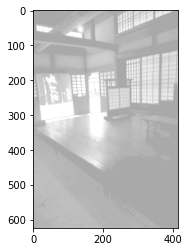

In [3]:
img = cv2.imread('img01a.png', 0)  # モノクロ画像として読み込み
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)

モノクロ画像として読み込んでいるので，画像（配列）のサイズは２次元．

numpyの配列には，``shape``というインスタンス変数があり，``.shape``とすることで，配列の形状を確認できる．

In [4]:
img.shape

(624, 416)

OpenCVでカラー画像を読み込んだ場合には，色変換が必要（３次元配列のRGBの順番が異なるため）．

ただし，この例では元画像がグレーなので，カラーでは表示されません．

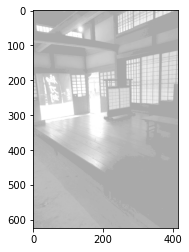

In [5]:
img_col = cv2.imread('img01a.png')  # カラー画像として読み込み
img_col = cv2.cvtColor(img_col, cv2.COLOR_BGR2RGB)
plt.imshow(img_col, vmin = 0, vmax = 255)

## 3.2 画像統計量の計算

最小値，最大値などの画像統計量は，以下のように計算できる．

In [6]:
minval = np.min(img)      # 最小値
maxval = np.max(img)      # 最大値
ave    = np.average(img)  # 平均値
median = np.median(img)   # 中央値
sd     = np.std(img)      # 標準偏差

print( minval, maxval )   # 最小値, 最大値
print( ave, median, sd )  # 平均値, 中央値, 標準偏差

169 255
189.9418685281065 182.0 24.051828719008537


## 3.3 ヒストグラムの描画
``plt.hist()``関数を用いてヒストグラムを描画できる．
ここでは，ビンの数: 25, 範囲: 0-255と設定している．

画像は２次元または３次元配列であるが，ヒストグラムを描画する際には１次元配列に変換する必要がある．

``.ravel()``を用いることで，多次元配列を1次元配列に変換できる．

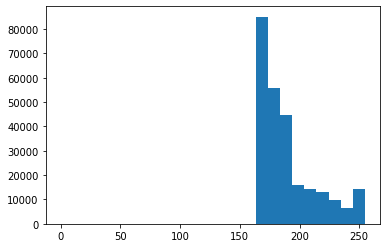

In [7]:
plt.hist(img.ravel(), bins=25, range=(0, 255));

以上は，``img01a.png``についての例でしたが，``img01b.png``についても確認してみましょう．

#  課題
画像統計量やヒストグラムを参考に，画像(``img01a.png``）のコントラストを上げる処理を行ってください．

全体的に明るい画像となっているため，図4.3 折れ線型トーンカーブ(2)のような処理を行うことになります．

下の``img2 = ????``の行を提出してください．

※ できる限り，「3.2 画像統計量の計算」で計算した変数``minval, maxval, ave, median, sd``を利用するように考えてください．

In [8]:
# 例えば，2で割った場合
img2 = img/2

### 以下変換の確認用
元画像と変換後画像の描画

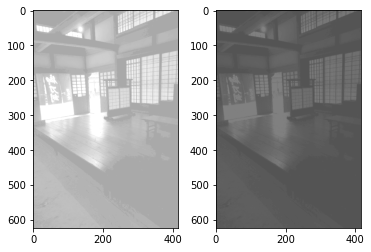

In [9]:
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray', vmin = 0, vmax = 255)

変換後画像のヒストグラム

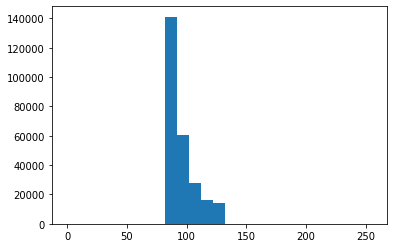

In [10]:
plt.hist(img2.ravel(), bins=25, range=(0, 255));

### ヒント
画像``img``の全体に関して，

*   画素値を2倍にしたい場合には，``2*img``
*   全体の画素値を50増やしたい場合には，``img+50``

とすればよいです．